# Introduction

This project involves using multiple ML classification algorithms to detect if an individual earns less than $50K annually or not. I will be comparing the accuracy of the different algorithms used and come to a conclusion on which is best suited for the aim of the project.

The data used for the project can be found using the link included:


https://www.kaggle.com/datasets/wenruliu/adult-income-dataset




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/adult.csv")

In [4]:
data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Observations

Initially, I can see that there aren't any nulls to deal with. However, columns such as "workclass" and "occupation" have question marks where the individual's information is unknown. To fix this, I will simply replace the question marks with the string "Unknown".

In [7]:
data["workclass"] = data["workclass"].str.replace("?", "Unknown")
data["occupation"] = data["occupation"].str.replace("?", "Unknown")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,227026,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# Feature selection

Now that the unknown's have been sorted, it is time for me to select what features will help the model best classify individual salaries.

I will do this by plotting histograms to visualize potential patterns.

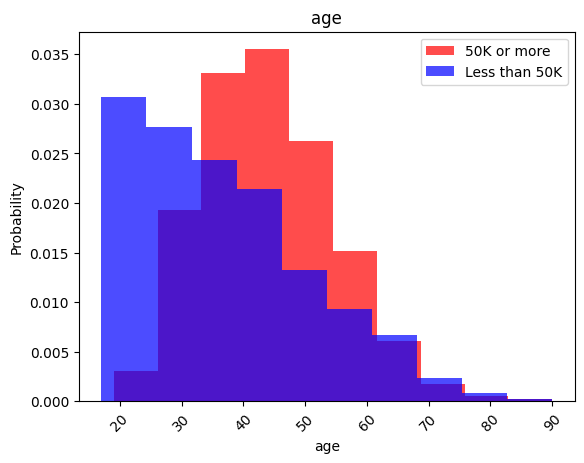

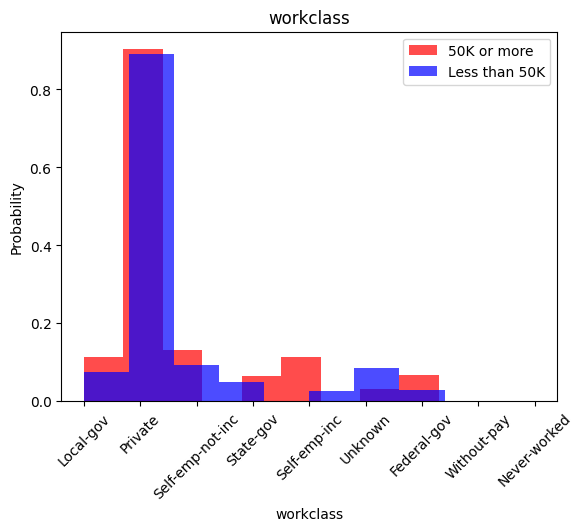

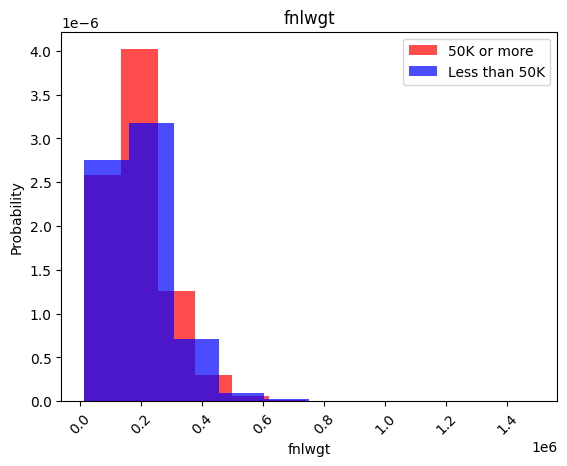

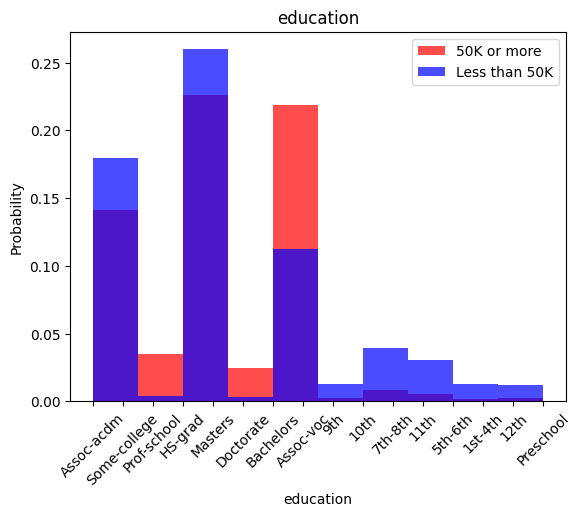

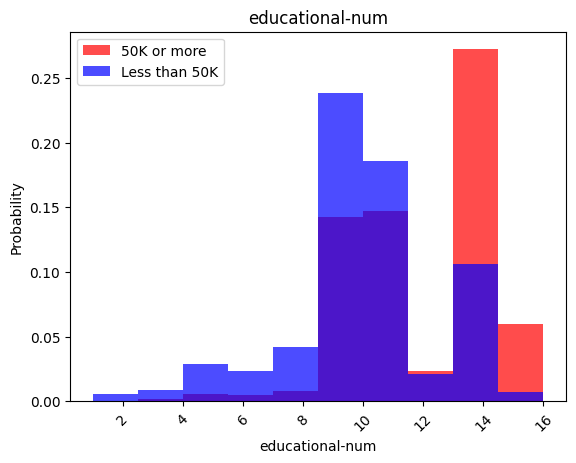

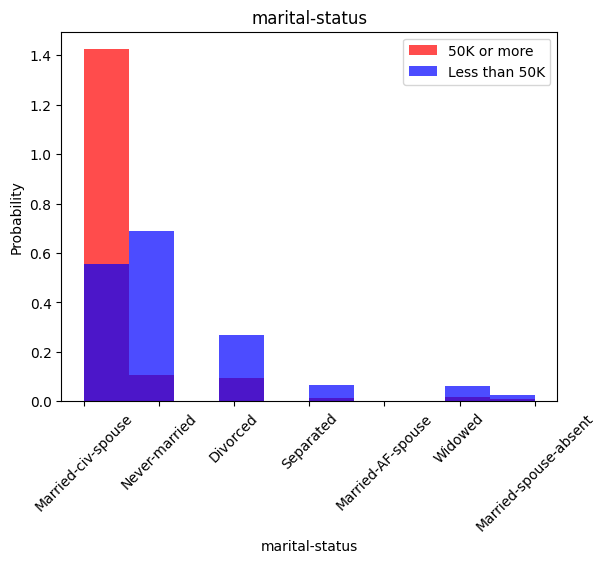

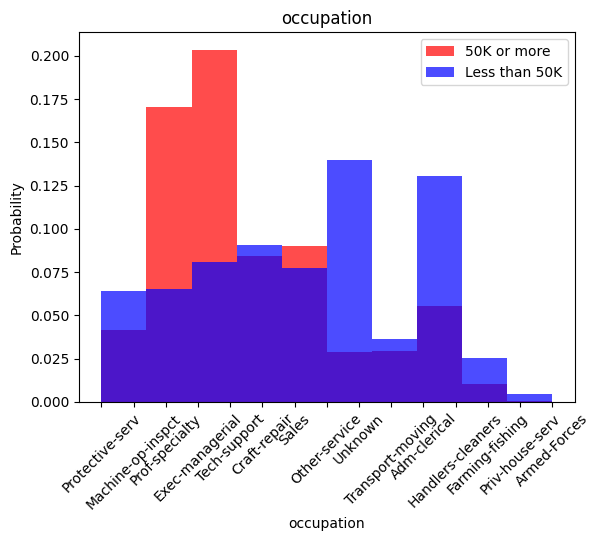

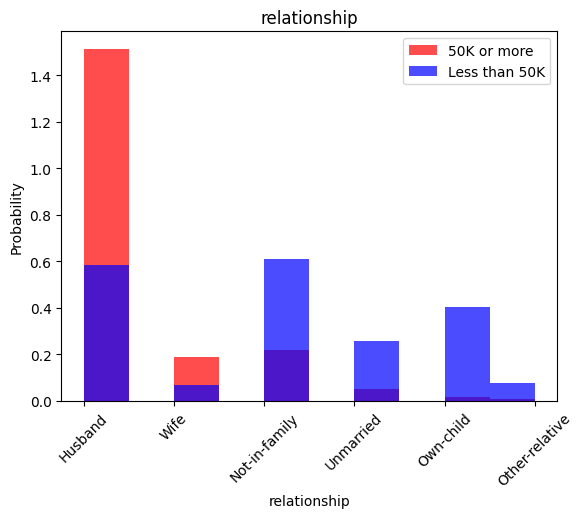

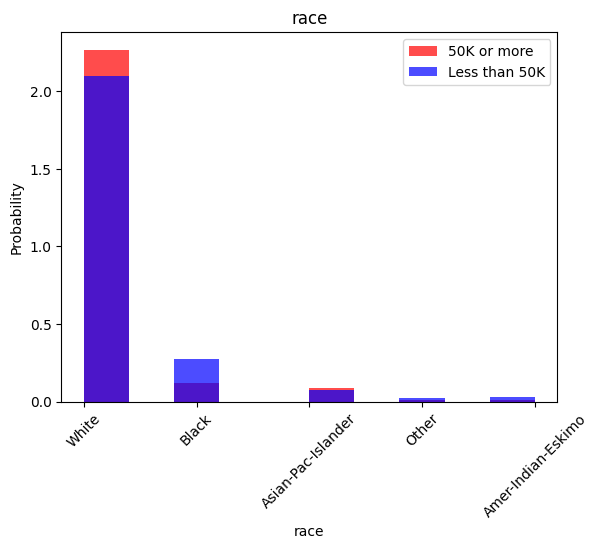

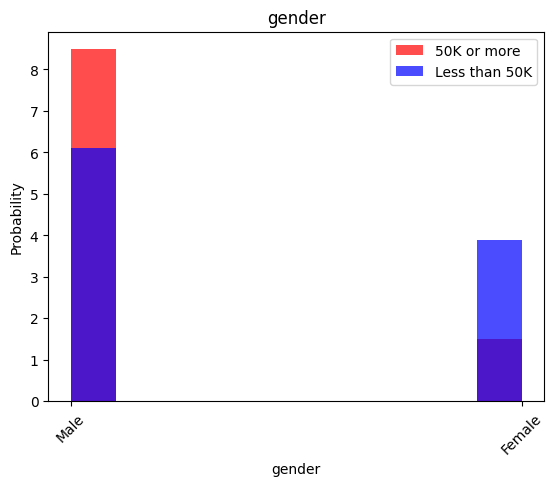

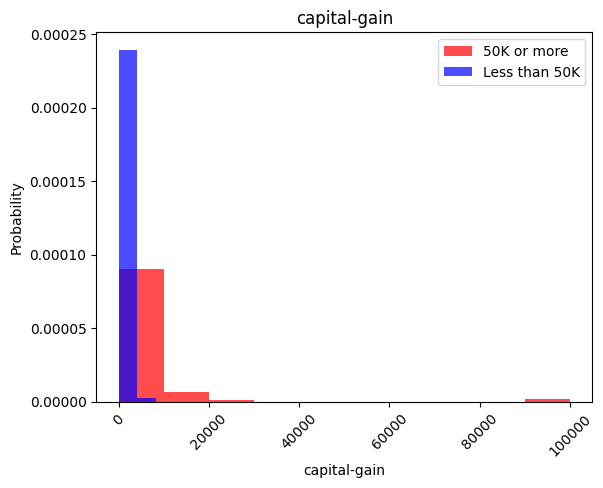

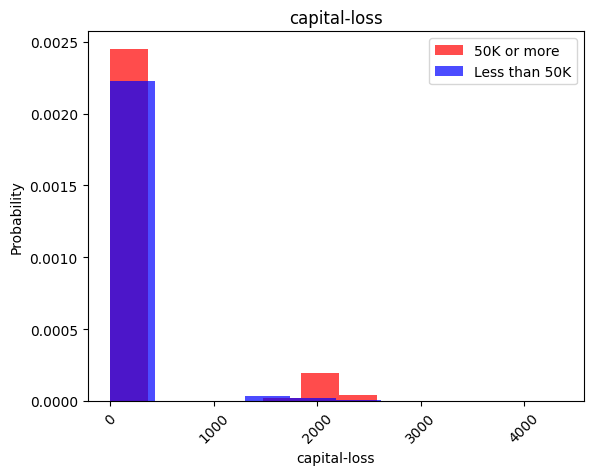

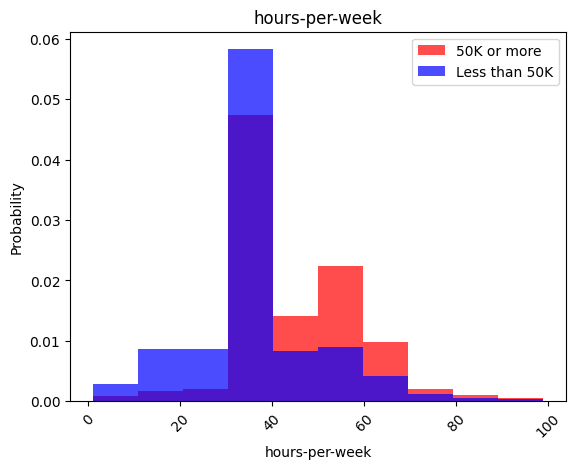

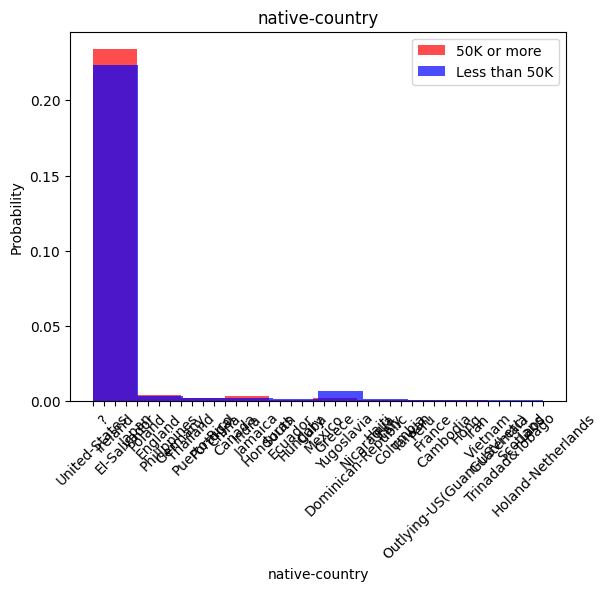

In [8]:
# Visualizations

data_columns = data.columns.tolist()
features = data_columns[:-1]

for feature in features:
  plt.hist(data[data["income"]==">50K"][feature], label="50K or more", color="red", alpha=0.7, density=True)
  plt.hist(data[data["income"]=="<=50K"][feature], label="Less than 50K", color="blue", alpha=0.7, density=True)
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# Observations

The histograms mostly indicate some sort of pattern/relationship with the income of individuals in the dataset. However, I think the "native-country" column needs further investigation.

In [9]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Investigating the "native-country" column has clarified my doubts about the variance of the countries recorded and has also revealed that native country of 857 people are not specified.

This must be addressed.

In [10]:
data["native-country"] = data["native-country"].str.replace("?", "Other")
data["native-country"] = data["native-country"].str.replace("Holand-Netherlands", "Other")
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
Other                           858
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Finally, I have decided to use all the columns as features in an attempt to classify individuals based on income.

In [11]:
# Importing neccessary libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**Classification with KNN**

Using KNN, I will predict the salary class of the individuals in the dataset.

In [12]:
X = data.drop("income", axis=1)
y = data["income"]

categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)            # 80/20 split


# Fitting model with training data
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# Evaluating model performance
y_test_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87      7479
        >50K       0.62      0.31      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.77      9769



**OBSERVATIONS**

The model has an accuracy of 79 percent and correctly classifies individuals making above USD50K at a 62 percent rate and at an 82 percent rate for those making USD50k or less annually.

The model could be optimized by making up for the imbalance in support (7479 vs 2290) by using weights.


In [13]:
# Attempting to optimize the KNN classifier

# Fitting optimized model with training data
knn_m = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn_m.fit(X_train, y_train)

# Evaluating optimized model performance
y_test_pr = knn_m.predict(X_test)
print(classification_report(y_test, y_test_pr))

              precision    recall  f1-score   support

       <=50K       0.83      0.91      0.87      7479
        >50K       0.57      0.37      0.45      2290

    accuracy                           0.79      9769
   macro avg       0.70      0.64      0.66      9769
weighted avg       0.77      0.79      0.77      9769



The overall accuracy of the model remains the same, while the precision when prediction earners 50K and below improved by one percent. The recall for the classification of earners above 50K improved significantly while the precision of this class worsened.

**CLASSIFICATION WITH NAIVE BAYES**

Using Naive Bayes, I will attempt to predict the class of the individuals in the dataset.

In [14]:
# Fitting NB model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Evaluating performance
nb_y_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7479
        >50K       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



**OBSERVATIONS**

The Naive Bayes model performs slightly better than the KNN models as its accuracy score is 1 percent higher. It also performs better than both KNN models when predicting the class of individuals earning above USD 50K.

**LOGISTIC REGRESSION**

Using Logistic regression, I will attempt to predict the class of the earners in the dataset.

In [15]:
# Fitting Model

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluating performance

lm_y_pred = log_model.predict(X_test)
print(classification_report(y_test, lm_y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7479
        >50K       0.71      0.27      0.39      2290

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



**OBSERVATIONS**

The logistic regression model has the joint highest accuracy (alongside NB) and also has the highest precision for predicting the class of individuals making over USD50K (by a significant margin).

The tradeoff is that the model is one percent less precise when predicting the class of those earning USD50K or less.

**CONCLUSION**

Given the observations documented previously, it is advisable to use the logistic regression model to predict the income class of earners in the USA based on the features used.

The Logistic regression model has:

- The joint highest model accuracy (80%).
- The highest precision for predicting the class of earners above USD 50K (71%).
- A precision of 81 % for predicting the class of earners at USD 50K or below.